In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
Uploaded=files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [3]:
train_df = pd.read_excel("Data_Train.xlsx")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_df.dropna(inplace=True)

In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_df.shape

(10682, 11)

In [11]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
train_df["Jounary_day"] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [13]:
train_df["Jounary_Month"] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [14]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jounary_day,Jounary_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
train_df.drop("Date_of_Journey",axis=1,inplace=True)

In [16]:
train_df["Deep_hour"] = pd.to_datetime(train_df.Dep_Time).dt.hour
train_df["Deep_min"] = pd.to_datetime(train_df.Dep_Time).dt.minute

In [17]:
train_df.drop("Dep_Time",axis=1,inplace=True)

In [18]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jounary_day,Jounary_Month,Deep_hour,Deep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
train_df["Arival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute

In [20]:
train_df.drop("Arrival_Time",axis=1,inplace=True)

In [21]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:

duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
train_df["Duration_hour"] = duration_hours
train_df["Duration_min"] = duration_mins

In [24]:
train_df.drop("Duration",axis=1,inplace=True)

In [25]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

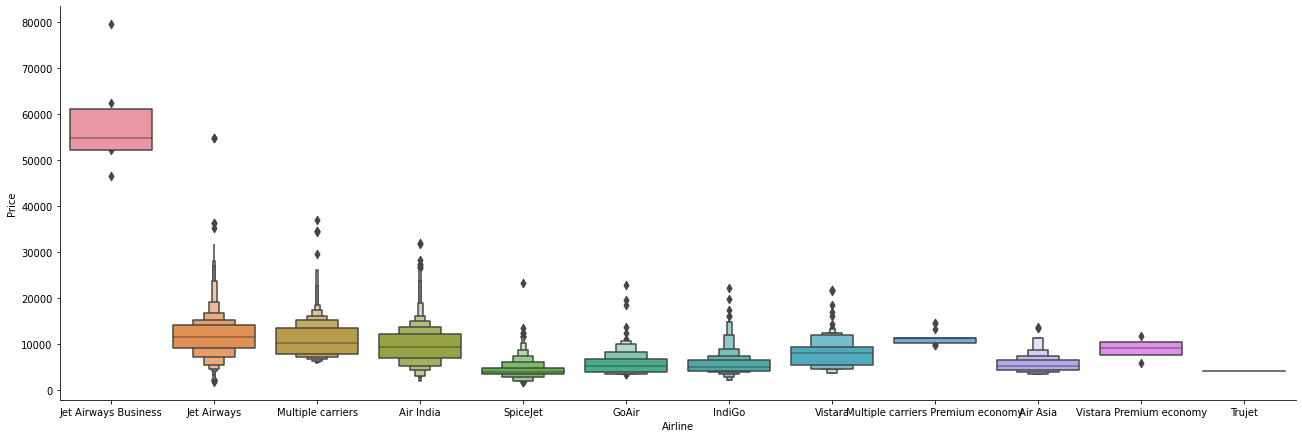

In [27]:
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [28]:
Airlines  = train_df[["Airline"]]
Airlines = pd.get_dummies(Airlines,drop_first=True)
Airlines.columns = Airlines.columns.str.replace(' ', '')

In [29]:
Airlines.head()

,Airline_AirIndia,Airline_GoAir,Airline_IndiGo,Airline_JetAirways,Airline_JetAirwaysBusiness,Airline_Multiplecarriers,Airline_MultiplecarriersPremiumeconomy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_VistaraPremiumeconomy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
train_df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

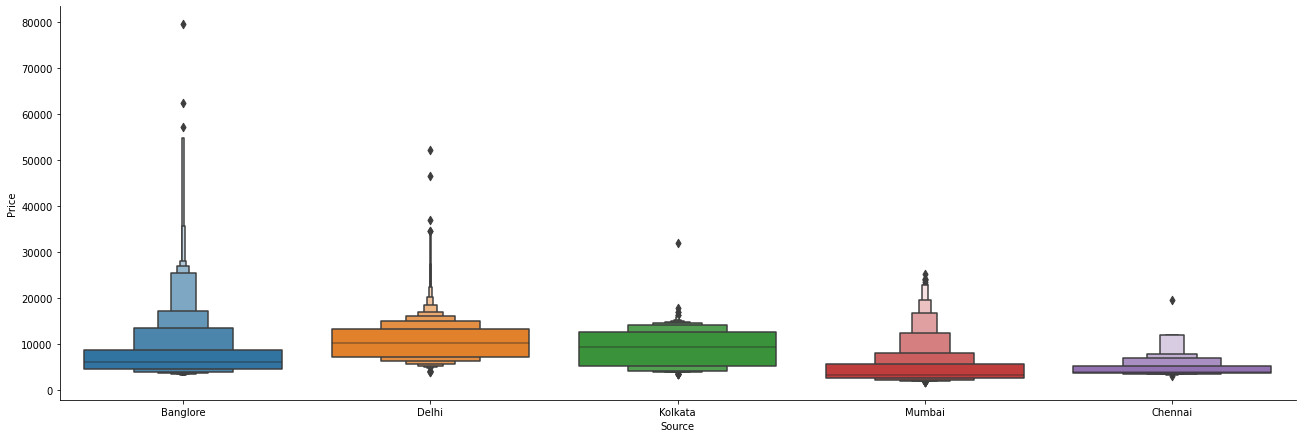

In [31]:
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
Source  = train_df[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)

In [33]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

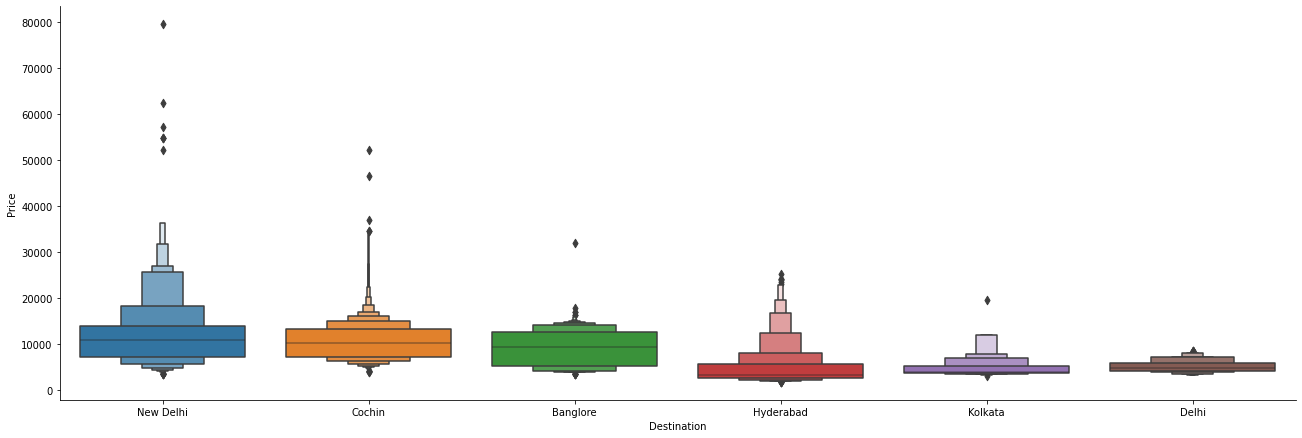

In [35]:
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [36]:
Destination  = train_df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.columns = Destination.columns.str.replace(' ', '')

In [37]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
train_df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [40]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [41]:
train_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [43]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [44]:
cont_train = pd.concat([train_df,Airlines,Destination,Source],axis=1)

In [45]:
cont_train.head()

,Airline,Source,Destination,Total_Stops,Price,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min,Airline_AirIndia,Airline_GoAir,Airline_IndiGo,Airline_JetAirways,Airline_JetAirwaysBusiness,Airline_Multiplecarriers,Airline_MultiplecarriersPremiumeconomy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_VistaraPremiumeconomy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [46]:
cont_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [47]:
cont_train.head()

,Total_Stops,Price,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min,Airline_AirIndia,Airline_GoAir,Airline_IndiGo,Airline_JetAirways,Airline_JetAirwaysBusiness,Airline_Multiplecarriers,Airline_MultiplecarriersPremiumeconomy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_VistaraPremiumeconomy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [48]:
 cont_train.shape

(10682, 30)

#TEST_DATA

In [49]:
from google.colab import files
Uploaded=files.upload()

Saving Test_set.xlsx to Test_set.xlsx


In [50]:
test_df = pd.read_excel("Test_set.xlsx")

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [54]:
test_df["Jounary_day"] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df["Jounary_Month"] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.month
test_df.drop("Date_of_Journey",axis=1,inplace=True)

In [55]:
test_df["Deep_hour"] = pd.to_datetime(test_df.Dep_Time).dt.hour
test_df["Deep_min"] = pd.to_datetime(test_df.Dep_Time).dt.minute

In [56]:
test_df.drop("Dep_Time",axis=1,inplace=True)

In [57]:
test_df["Arival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [58]:
duration = list(test_df['Duration'])

duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [59]:
test_df["Duration_hour"] = duration_hours
test_df["Duration_min"] = duration_mins

In [60]:
test_df.drop("Duration",axis=1,inplace=True)

In [61]:
test_df["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [62]:
Airlines  = test_df[["Airline"]]
Airlines = pd.get_dummies(Airlines,drop_first=True)
Airlines.columns = Airlines.columns.str.replace(' ', '')

In [63]:
Source  = test_df[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)

In [64]:
Destination  = test_df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.columns = Destination.columns.str.replace(' ', '')
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [65]:
test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [66]:
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [67]:
cont_test = pd.concat([test_df,Airlines,Destination,Source],axis=1)

In [68]:
cont_test.head()

,Airline,Source,Destination,Total_Stops,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min,Airline_AirIndia,Airline_GoAir,Airline_IndiGo,Airline_JetAirways,Airline_JetAirwaysBusiness,Airline_Multiplecarriers,Airline_MultiplecarriersPremiumeconomy,Airline_SpiceJet,Airline_Vistara,Airline_VistaraPremiumeconomy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
cont_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [70]:
cont_test.head()

,Total_Stops,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min,Airline_AirIndia,Airline_GoAir,Airline_IndiGo,Airline_JetAirways,Airline_JetAirwaysBusiness,Airline_Multiplecarriers,Airline_MultiplecarriersPremiumeconomy,Airline_SpiceJet,Airline_Vistara,Airline_VistaraPremiumeconomy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
X = cont_train.drop("Price",axis=1)

In [72]:
y = cont_train.Price

In [73]:
X.head()

,Total_Stops,Jounary_day,Jounary_Month,Deep_hour,Deep_min,Arival_hour,Arival_min,Duration_hour,Duration_min,Airline_AirIndia,Airline_GoAir,Airline_IndiGo,Airline_JetAirways,Airline_JetAirwaysBusiness,Airline_Multiplecarriers,Airline_MultiplecarriersPremiumeconomy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_VistaraPremiumeconomy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_NewDelhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

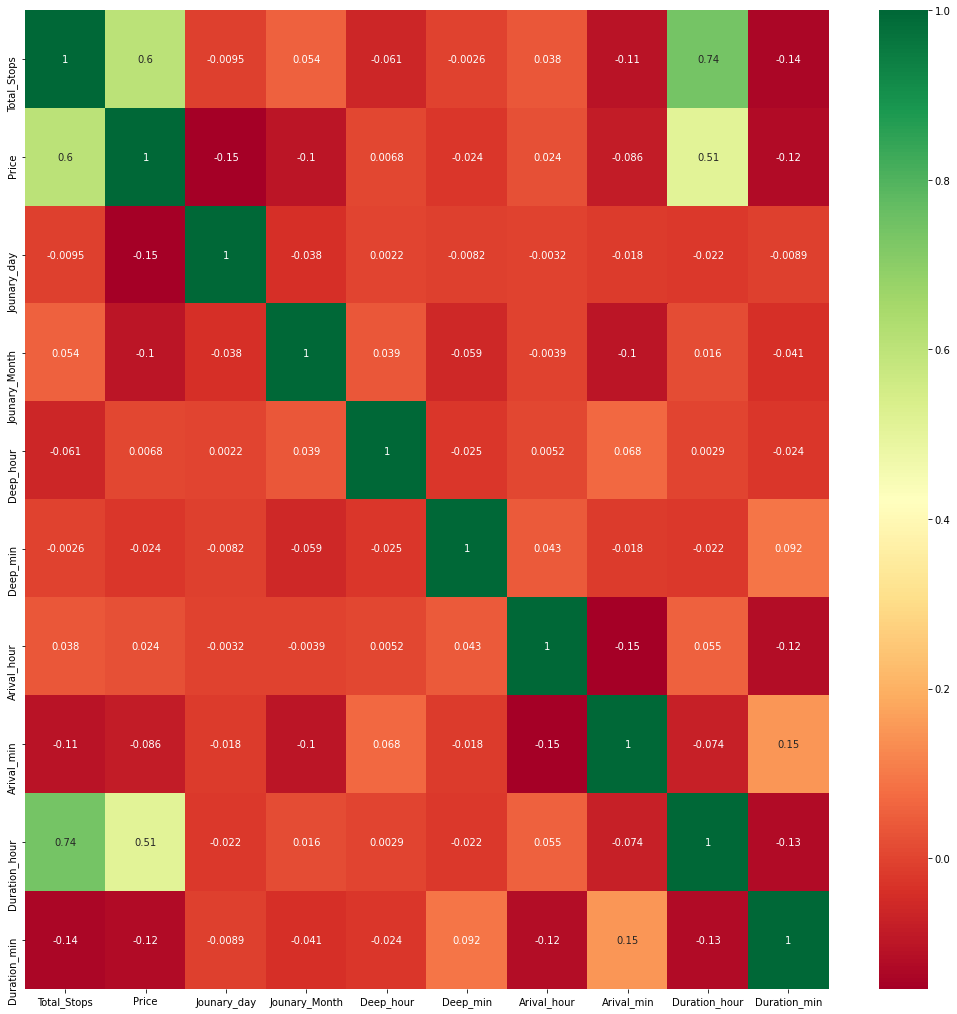

In [75]:
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [77]:
print(selection.feature_importances_)

[2.26059848e-01 1.42906087e-01 5.36792472e-02 2.35116086e-02
 2.09603180e-02 2.78876272e-02 1.98226805e-02 1.42251928e-01
 1.81381386e-02 8.48583381e-03 2.15712343e-03 1.79501856e-02
 1.25530459e-01 6.73703816e-02 1.85594853e-02 7.79158944e-04
 3.17142450e-03 1.18450325e-04 4.80675432e-03 8.86011330e-05
 1.10484869e-02 1.25856898e-02 6.67188062e-03 4.19663343e-04
 2.50365404e-02 4.03794378e-04 1.03183623e-02 3.26162145e-03
 6.01861903e-03]


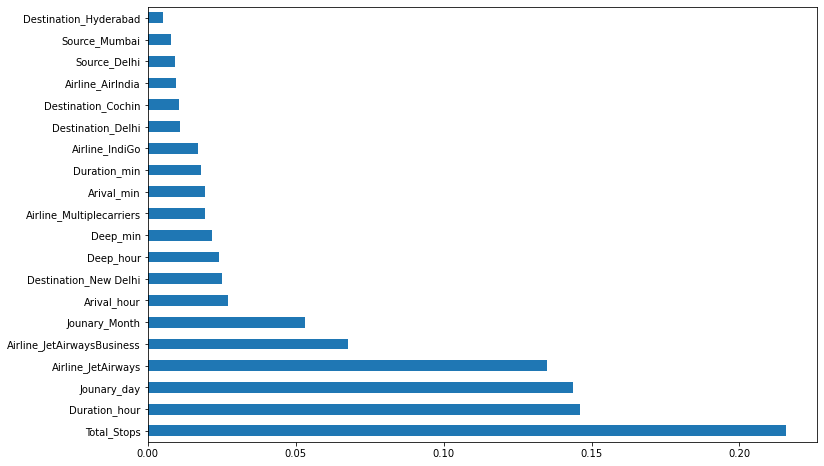

In [80]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [81]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [82]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [83]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [84]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [85]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [86]:
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


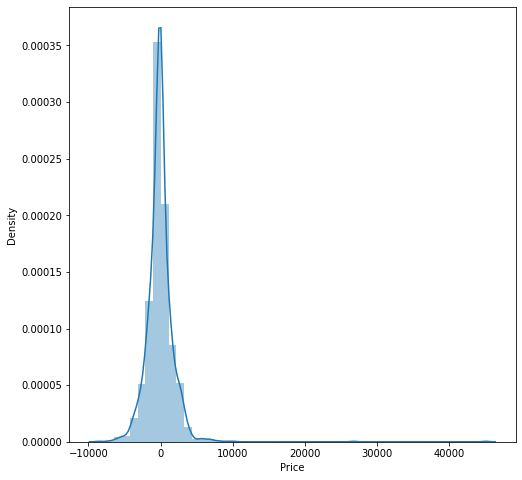

In [87]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

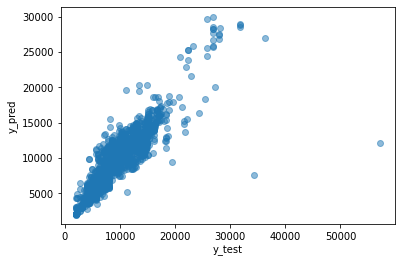

In [88]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pickle
print("[INFO] Saving model...")
saved_model=pickle.dump(rf_random,open('/content/drive/My Drive/flight.pkl', 'wb'))

[INFO] Saving model...


In [106]:
import joblib
filename = '/content/drive/My Drive/flight.sav'
joblib.dump(rf_random, filename)


['/content/drive/My Drive/flight.sav']

In [107]:
!pip install streamlit

     |████████████████████████████████| 788kB 24.7MB/s 
     |████████████████████████████████| 368kB 26.3MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [108]:
!pip install pyngrok

In [109]:
!ngrok authtoken 1tcSDKNHf56uChGfo16x2VAtZQl_5y1GPbfxnUSdFJicFzSuJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [174]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/flight.pkl', 'rb'))

def predict_price(Total_Stops, Jounary_day, Jounary_Month, Deep_hour, Deep_min,
       Arival_hour, Arival_min,Duration_hour, Duration_min,
       Airline_AirIndia, Airline_GoAir, Airline_IndiGo,
       Airline_JetAirways, Airline_JetAirwaysBusiness,
       Airline_Multiplecarriers,
       Airline_MultiplecarriersPremiumeconomy, Airline_SpiceJet,
       Airline_Trujet, Airline_Vistara, Airline_VistaraPremiumeconomy,
       Destination_Cochin, Destination_Delhi, Destination_Hyderabad,
       Destination_Kolkata, Destination_NewDelhi, Source_Chennai,
       Source_Delhi, Source_Kolkata, Source_Mumbai):
  input = np.array([[Total_Stops, Jounary_day, Jounary_Month, Deep_hour, Deep_min,
       Arival_hour, Arival_min,Duration_hour, Duration_min,
       Airline_AirIndia, Airline_GoAir, Airline_IndiGo,
       Airline_JetAirways, Airline_JetAirwaysBusiness,
       Airline_Multiplecarriers,
       Airline_MultiplecarriersPremiumeconomy, Airline_SpiceJet,
       Airline_Trujet, Airline_Vistara, Airline_VistaraPremiumeconomy,
       Destination_Cochin, Destination_Delhi, Destination_Hyderabad,
       Destination_Kolkata, Destination_NewDelhi, Source_Chennai,
       Source_Delhi, Source_Kolkata, Source_Mumbai]]).astype(np.float64)
  prediction = model.predict(input)
  return float(prediction)

def main():
  st.title("50_Startups")
  html_temp ="""
  <div style="background-color:black; padding:10px">
  <h2 style="color:white;text-align:center;">50_Startups</h2>
  </div>
  """
  st.markdown(html_temp,unsafe_allow_html=True)
  Total_Stops = st.text_input("Total Stops")

  Jounary_Day = st.date_input('Jounary_Day')
  Jounary_day = pd.to_datetime(Jounary_Day,format="%Y-%m-%d").day
  Jounary_Month = pd.to_datetime(Jounary_Day,format="%Y-%m-%d").month

  Depature = st.time_input('Depature Time')
  Deep_hour = int(pd.to_datetime(Depature, format ="%H:%M:%S").hour)
  Deep_min = int(pd.to_datetime(Depature, format ="%H:%M:%S").minute)

  Arival = st.time_input('Arival Time')
  Arival_hour = int(pd.to_datetime(Arival, format ="%H:%M:%S").hour)
  Arival_min = int(pd.to_datetime(Arival, format ="%H:%M:%S").minute)

  Duration_hour = abs(Arival_hour-Deep_hour)
  Duration_min = abs(Arival_min-Deep_min)


  airline = st.selectbox('Select Airlines name:',('IndiGo', 'Air India', 'Jet Airways', 'SpiceJet','Multiple carriers', 'GoAir', 'Vistara', 'Air Asia','Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet'))
 
  if (airline=='Jet Airways'):
     Airline_AirIndia = 0
     Airline_GoAir = 0
     Airline_IndiGo = 0
     Airline_JetAirways = 1
     Airline_JetAirwaysBusiness = 0
     Airline_Multiplecarriers = 0
     Airline_MultiplecarriersPremiumeconomy = 0
     Airline_SpiceJet = 0
     Airline_Trujet = 0
     Airline_Vistara = 0
     Airline_VistaraPremiumeconomy = 0
            

  elif (airline=='IndiGo'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 1
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0

            
  elif (airline=='Air India'):
   Airline_AirIndia = 1
   Airline_GoAir = 0
   Airline_IndiGo = 0
   Airline_JetAirways = 0
   Airline_JetAirwaysBusiness = 0
   Airline_Multiplecarriers = 0
   Airline_MultiplecarriersPremiumeconomy = 0
   Airline_SpiceJet = 0
   Airline_Trujet = 0
   Airline_Vistara = 0
   Airline_VistaraPremiumeconomy = 0
            

  elif (airline=='Multiple carriers'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 1
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0
            

  elif (airline=='SpiceJet'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 1
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0
                        
  elif (airline=='Vistara'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 1
    Airline_VistaraPremiumeconomy = 0

  elif (airline=='GoAir'):
    Airline_AirIndia = 0
    Airline_GoAir = 1
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0

  elif (airline=='Multiple carriers Premium economy'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 1
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0

  elif (airline=='Jet Airways Business'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 1
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0

  elif (airline=='Vistara Premium economy'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 1

  elif (airline=='Trujet'):
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 1
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0

  else:
    Airline_AirIndia = 0
    Airline_GoAir = 0
    Airline_IndiGo = 0
    Airline_JetAirways = 0
    Airline_JetAirwaysBusiness = 0
    Airline_Multiplecarriers = 0
    Airline_MultiplecarriersPremiumeconomy = 0
    Airline_SpiceJet = 0
    Airline_Trujet = 0
    Airline_Vistara = 0
    Airline_VistaraPremiumeconomy = 0

  Destination = st.selectbox('Select Destination name:',('New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'))
  if (Destination == 'Cochin'):
    Destination_Cochin = 1
    Destination_Delhi = 0
    Destination_NewDelhi = 0
    Destination_Hyderabad = 0
    Destination_Kolkata = 0
            
        
  elif (Destination == 'Delhi'):
    Destination_Cochin = 0
    Destination_Delhi = 1
    Destination_NewDelhi = 0
    Destination_Hyderabad = 0
    Destination_Kolkata = 0

  elif (Destination == 'New_Delhi'):
    Destination_Cochin = 0
    Destination_Delhi = 0
    Destination_NewDelhi = 1
    Destination_Hyderabad = 0
    Destination_Kolkata = 0

  elif (Destination == 'Hyderabad'):
    Destination_Cochin = 0
    Destination_Delhi = 0
    Destination_NewDelhi = 0
    Destination_Hyderabad = 1
    Destination_Kolkata = 0

  elif (Destination == 'Kolkata'):
    Destination_Cochin = 0
    Destination_Delhi = 0
    Destination_NewDelhi = 0
    Destination_Hyderabad = 0
    Destination_Kolkata = 1

  else:
    Destination_Cochin = 0
    Destination_Delhi = 0
    Destination_NewDelhi = 0
    Destination_Hyderabad = 0
    Destination_Kolkata = 0  
  Source = st.selectbox('Select Source name:',('Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'))  
  if Source == 'Delhi':
    Source_Delhi = 1
    Source_Kolkata = 0
    Source_Mumbai = 0
    Source_Chennai = 0

  elif Source == 'Kolkata':
    Source_Delhi = 0
    Source_Kolkata = 1
    Source_Mumbai = 0
    Source_Chennai = 0

  elif Source == 'Mumbai':
    Source_Delhi = 0
    Source_Kolkata = 0
    Source_Mumbai = 1
    Source_Chennai = 0

  elif Source == 'Chennai':
    Source_Delhi = 0
    SourceKolkata = 0
    Source_Mumbai = 0
    Source_Chennai = 1

  else:
    Source_Delhi = 0
    Source_Kolkata = 0
    Source_Mumbai = 0
    Source_Chennai = 0    

  
  if st.button("Predict"):
    output = predict_price(Total_Stops, Jounary_day, Jounary_Month, Deep_hour, Deep_min,
       Arival_hour, Arival_min, Duration_hour, Duration_min,
       Airline_AirIndia,Airline_GoAir, Airline_IndiGo,
       Airline_JetAirways, Airline_JetAirwaysBusiness,
       Airline_Multiplecarriers, Airline_MultiplecarriersPremiumeconomy,
       Airline_SpiceJet, Airline_Trujet, Airline_Vistara,
       Airline_VistaraPremiumeconomy, Destination_Cochin,
       Destination_Delhi, Destination_Hyderabad, Destination_Kolkata,
       Destination_NewDelhi, Source_Chennai, Source_Delhi,
       Source_Kolkata, Source_Mumbai)
    st.success(round(output))

  if st.button("About"):
    st.header("By Hritwick Goyal")
    st.subheader("Intern")
  
if __name__=='__main__':
  main()

Overwriting app.py


In [175]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://46e919190e08.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.86.236.104:80

